In [75]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable


Index(['OBJECTID', 'Assessment', 'FileType', 'GeoParcelIdentificationNumber',
       'IsMultiParcelPolygon', 'Label', 'LegalDescription', 'LotSquareFeet',
       'MapPage', 'ModifiedDate', 'OwnerName', 'OwnerAddress',
       'OwnerCityState', 'OwnerZipCode', 'ParcelNumber', 'StreetName',
       'StreetNumber', 'TaxYear', 'Text', 'Unit', 'Zoning', 'ESRI_OID',
       'geometry'],
      dtype='object')
       OBJECTID  Assessment FileType  GeoParcelIdentificationNumber  \
0             1      449700        R                              3   
1             2      388100        R                              5   
2             3      486200        R                              6   
3             4      444300        R                              8   
4             5      474000        R                             10   
...         ...         ...      ...                            ...   
16023     69853           0        E                          17636   
16024     79551           0  

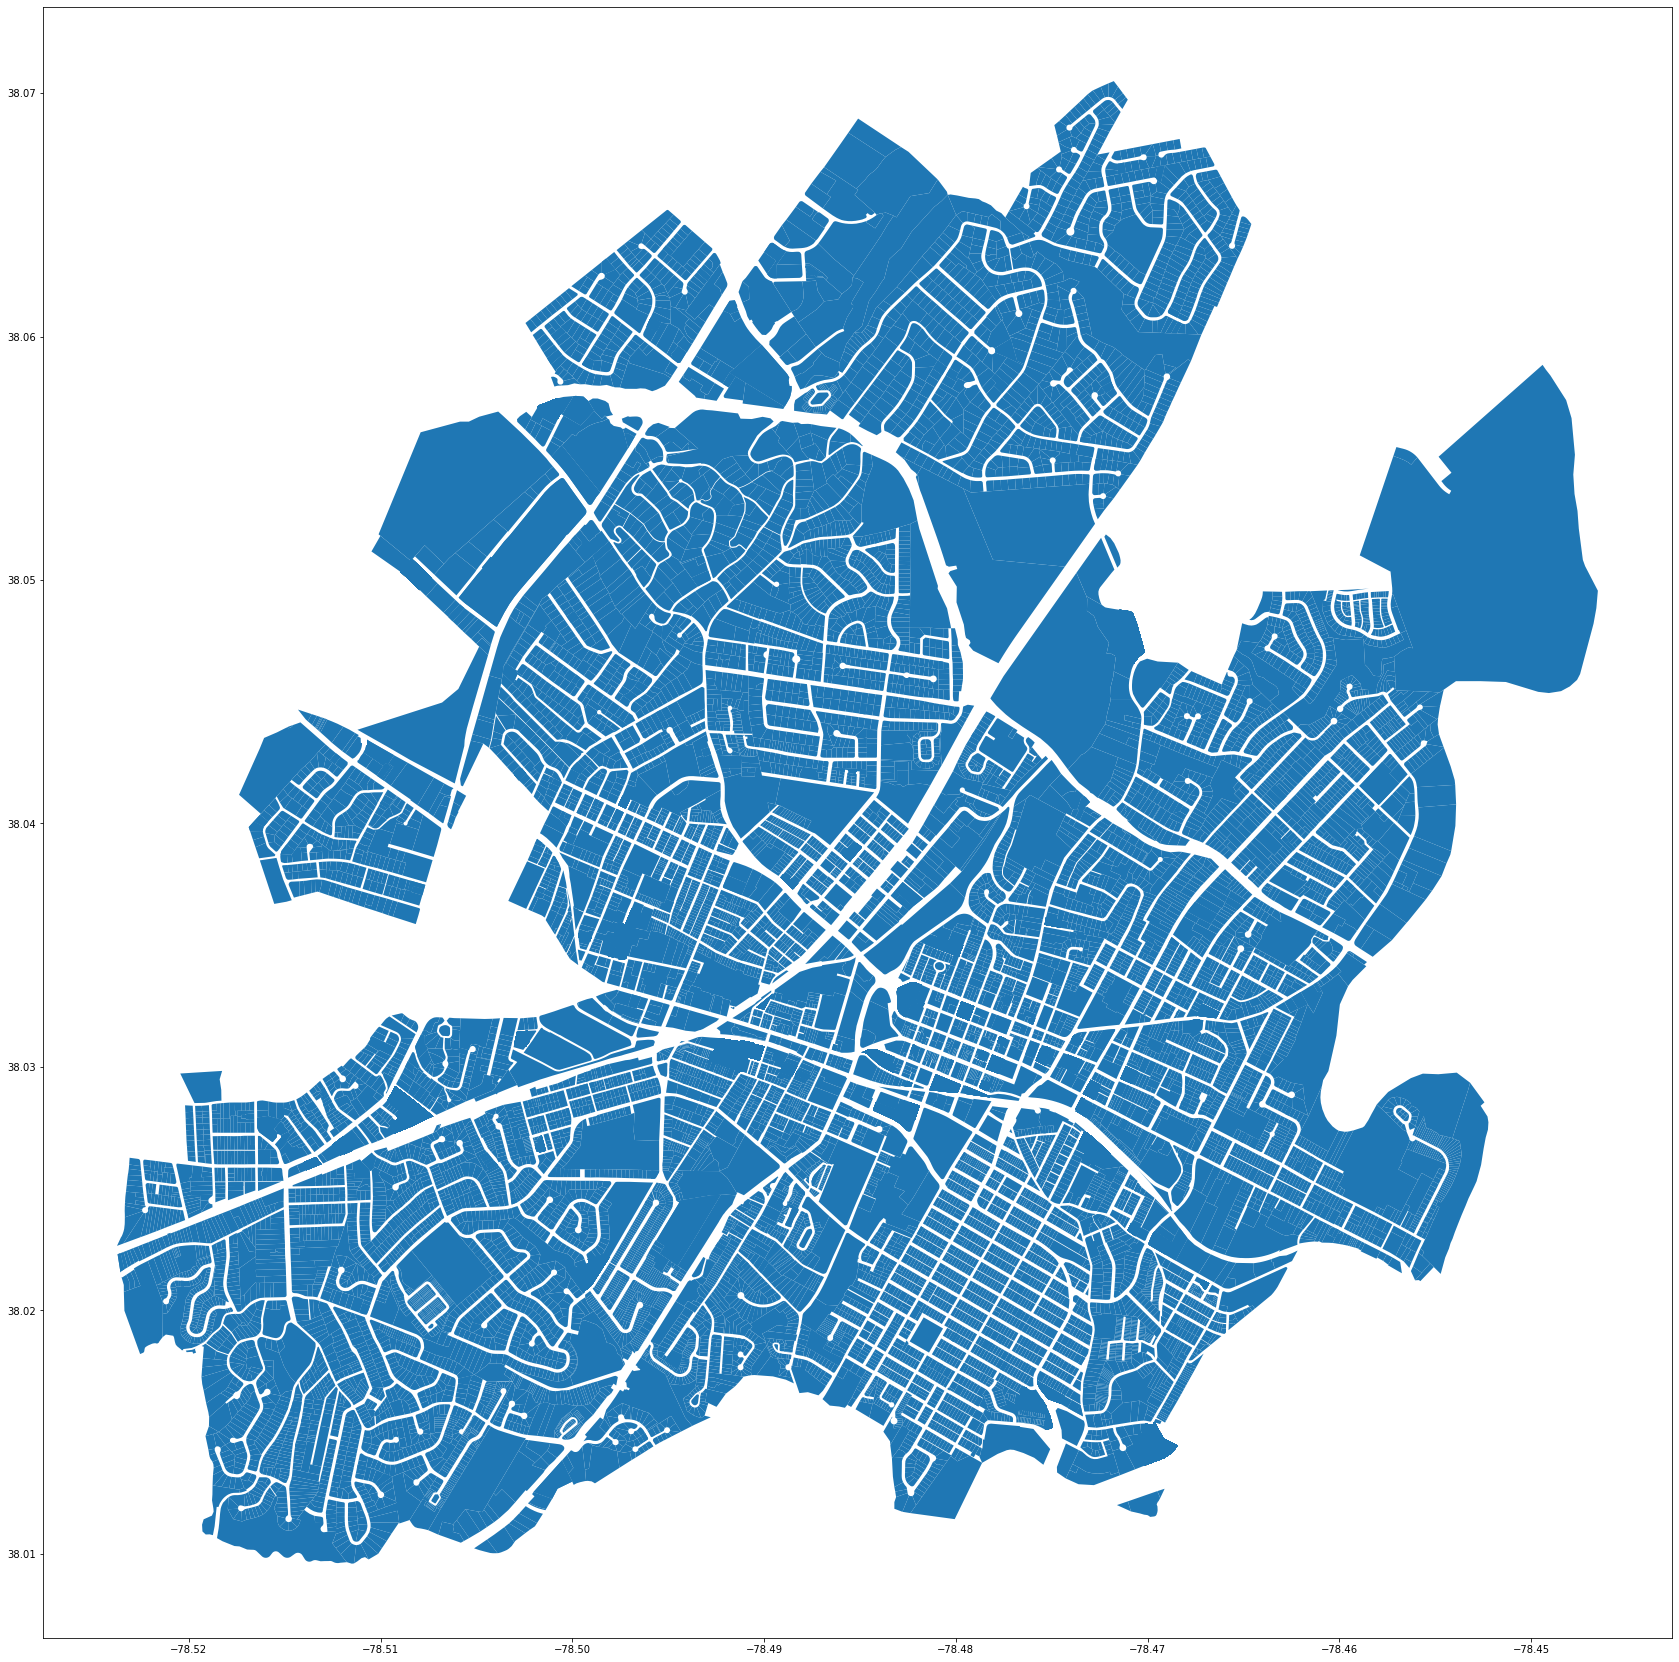

In [24]:
cville_parcels = gpd.read_file('https://opendata.arcgis.com/datasets/0e9946c2a77d4fc6ad16d9968509c588_72.geojson')

fig,ax = plt.subplots(figsize=(30,30))
cville_parcels.plot(ax=ax)

print (cville_parcels.columns)
print (cville_parcels)

In [59]:
assessment_numbers = gpd.read_file('https://opendata.arcgis.com/datasets/b993cd4e2e1b4ba097fb58c90725f5da_2.geojson')
print (assessment_numbers.columns)

assessment_2015 = assessment_numbers[assessment_numbers.TaxYear == '2015'].copy()
assessment_2016 = assessment_numbers[assessment_numbers.TaxYear == '2016'].copy()
assessment_2017 = assessment_numbers[assessment_numbers.TaxYear == '2017'].copy()
assessment_2018 = assessment_numbers[assessment_numbers.TaxYear == '2018'].copy()
assessment_2019 = assessment_numbers[assessment_numbers.TaxYear == '2019'].copy()
assessment_2020 = assessment_numbers[assessment_numbers.TaxYear == '2020'].copy()

print (assessment_2015)

assessment_2016.rename(columns={'LandValue': '2016LandValue', 'ImprovementValue':'2016ImprovmentValue', 'TotalValue':'2016TotalValue'}, inplace=True)
assessment_2020.rename(columns={'LandValue': '2020LandValue', 'ImprovementValue':'2020ImprovmentValue', 'TotalValue':'2020TotalValue'}, inplace=True)
merge_2016_2020 = pd.merge(left = assessment_2016, right = assessment_2020,  left_on='ParcelNumber', right_on='ParcelNumber')
merge_2016_2020.drop(['TaxYear_y','StreetName_y', 'StreetNumber_y', 'Unit_y', 'geometry_y', 'TaxYear_x', 'geometry_x'], axis=1, inplace=True)
print ('merged_shit_yo', merge_2016_2020.ParcelNumber.unique(), len(merge_2015_2020))


merge_20162020_shapes = pd.merge(left = merge_2016_2020, right = cville_parcels,  left_on='ParcelNumber', right_on='ParcelNumber')
print (merge_20152020_shapes)


print (merge_20152020_shapes)


Index(['RecordID_Int', 'ParcelNumber', 'LandValue', 'ImprovementValue',
       'TotalValue', 'TaxYear', 'StreetName', 'StreetNumber', 'Unit',
       'geometry'],
      dtype='object')
        RecordID_Int ParcelNumber  LandValue  ImprovementValue  TotalValue  \
5                  6    010001000   22848500          98390000   121238500   
29                30    010001100    1869600           2229200     4098800   
53                54    010001200     708000            222500      930500   
77                78    010001300     445700            386300      832000   
101              102    010001400    2405600           8039100    10444700   
...              ...          ...        ...               ...         ...   
347390        347127    610314000      33500            115200      148700   
347412        347149    610315000      33500            114800      148300   
347434        347171    610316000      33500            115100      148600   
347456        347193    610317000   

In [92]:


merge_20162020_shapes['total_diff'] = merge_20162020_shapes['2020TotalValue'].astype(int) - merge_20162020_shapes['2016TotalValue'].astype(int)
merge_20162020_shapes['percent_diff'] = merge_20162020_shapes['total_diff'].astype(int) / merge_20162020_shapes['2016TotalValue'].astype(int)


to_map = gpd.GeoDataFrame(merge_20162020_shapes, geometry='geometry')
print ('Fuck',to_map.percent_diff.isnull().sum())

print (to_map.percent_diff.min, to_map.percent_diff.max)
to_map['percent_diff_integer'] = to_map['percent_diff']*100

fig, ax = plt.subplots(figsize=(30,30))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

data = to_map.plot(column='percent_diff_integer', ax = ax, vmin=0.05, vmax=53, cmap=cmocean.cm.haline, legend = 'True', cax=cax)

ax.axis('off')
ax.set_title('Percent rise in assessment btwn 2016 and 2020')
plt.savefig('change_in_cville_assessments.jpg', bbox_inches='tight')
plt.close()


Fuck 18
<bound method Series.min of 0        0.524620
1        0.524620
2        0.266562
3        0.547149
4        0.111389
           ...   
15801    0.075992
15802    0.137559
15803    0.076716
15804    0.076716
15805    0.183862
Name: percent_diff, Length: 15806, dtype: float64> <bound method Series.max of 0        0.524620
1        0.524620
2        0.266562
3        0.547149
4        0.111389
           ...   
15801    0.075992
15802    0.137559
15803    0.076716
15804    0.076716
15805    0.183862
Name: percent_diff, Length: 15806, dtype: float64>
